In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("spam.csv",encoding='latin-1')[['v1','v2']]
df.columns=['label','Text']
df['label']=df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#Feature Engineering:Extract Numerical Features
df['text_length']=df['Text'].apply(len)
df['num_words']=df['Text'].apply(lambda x: len(x.split()))
df['num_digits']=df['Text'].apply(lambda x: sum(c.isdigit() for c in x))
#Define features and target
x=df[['text_length','num_words','num_digits']]
y=df['label']
#split Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#standardize the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
#Train Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train_scaled,y_train)
y_pred_gnb=gnb.predict(x_test_scaled)
#Evaluate the model 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Gaussian Naive Bayes Classifier Performance:")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_gnb))
print("Classification Report:\n",classification_report(y_test,y_pred_gnb))
print("Accuracy:",accuracy_score(y_test,y_pred_gnb))

Gaussian Naive Bayes Classifier Performance:
Confusion Matrix:
 [[953  12]
 [ 10 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.92      0.93      0.93       150

    accuracy                           0.98      1115
   macro avg       0.96      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.9802690582959641


# MULTINOMIAL NAVIE BAYES(FOR TEXT DATA)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
#convert text data into word count vectors
vectorizer=CountVectorizer(stop_words='english')
x_counts=vectorizer.fit_transform(df['Text'])
#convert count vectors into tf-idf representation
tfidf_transformer=TfidfTransformer()
x_tfidf=tfidf_transformer.fit_transform(x_counts)
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, df['label'], test_size=0.2, random_state=42)
#Train Multinomial Naive Bayes Classifier
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb=mnb.predict(x_test)
print("Multinomial Naive Bayes Classifier Performance:")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_mnb))
print("Classification Report:\n",classification_report(y_test,y_pred_mnb))
print("Accuracy:",accuracy_score(y_test,y_pred_mnb))

Multinomial Naive Bayes Classifier Performance:
Confusion Matrix:
 [[965   0]
 [ 35 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.77      0.87       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Accuracy: 0.968609865470852


# Bernoulli naive Bayes(for binary features)

In [6]:
#convert text into binary presence/absence of important words
important_words=['free','win','offer','money','urgent']
for word in important_words:
    df[word]=df['Text'].apply(lambda x: 1 if word in x.lower() else 0)
#define features and target
x=df[important_words]
y=df['label']
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Train Bernoulli Naive Bayes Classifier
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb=bnb.predict(x_test)
print("Bernoulli Naive Bayes Classifier Performance:")
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_bnb))
print("Classification Report:\n",classification_report(y_test,y_pred_bnb))
print("Accuracy:",accuracy_score(y_test,y_pred_bnb))

Bernoulli Naive Bayes Classifier Performance:
Confusion Matrix:
 [[929  36]
 [ 81  69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       965
           1       0.66      0.46      0.54       150

    accuracy                           0.90      1115
   macro avg       0.79      0.71      0.74      1115
weighted avg       0.88      0.90      0.89      1115

Accuracy: 0.895067264573991


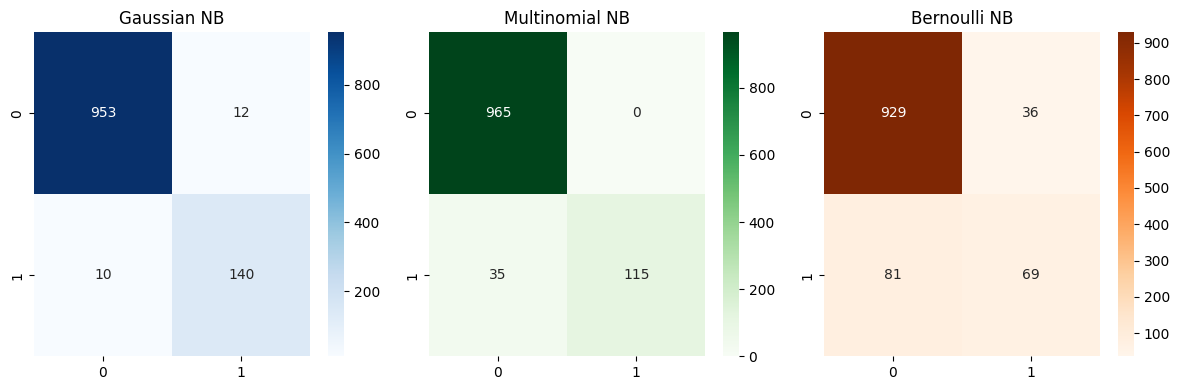

In [7]:

import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True,fmt='d',cmap='Blues')
plt.title('Gaussian NB')
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test,y_pred_mnb),annot=True,fmt='d',cmap='Greens')
plt.title('Multinomial NB')
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test,y_pred_bnb),annot=True,fmt='d',cmap='Oranges')
plt.title('Bernoulli NB')
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


In [10]:
df = pd.read_csv("spam.csv", encoding="latin-1")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df = df.iloc[:, :2]
df.columns = ["label", "message"]

print("Shape:", df.shape)
df.head()


Shape: (5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
print("Label counts:")
print(df["label"].value_counts())


Label counts:
label
ham     4825
spam     747
Name: count, dtype: int64


In [13]:
df["target"] = df["label"].map({"ham": 0, "spam": 1})
df.head()


,label,message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
X = df["message"]
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (4457,)
Test : (1115,)


In [15]:
vectorizer = TfidfVectorizer(stop_words="english")

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF Train shape:", X_train_tfidf.shape)
print("TF-IDF Test shape :", X_test_tfidf.shape)


TF-IDF Train shape: (4457, 7440)
TF-IDF Test shape : (1115, 7440)


In [16]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


In [17]:
y_pred = nb_model.predict(X_test_tfidf)
y_pred[:20]



array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
print("✅ PERFORMANCE METRICS")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


✅ PERFORMANCE METRICS
Accuracy : 0.968609865470852
Precision: 1.0
Recall   : 0.7651006711409396
F1 Score : 0.8669201520912547


In [19]:
print(classification_report(y_test, y_pred, target_names=["Not Suspicious", "Suspicious"]))


                precision    recall  f1-score   support

Not Suspicious       0.97      1.00      0.98       966
    Suspicious       1.00      0.77      0.87       149

      accuracy                           0.97      1115
     macro avg       0.98      0.88      0.92      1115
  weighted avg       0.97      0.97      0.97      1115



In [20]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

TN, FP, FN, TP = cm.ravel()

print("\n✅ REQUIRED ANALYSIS")
print("Suspicious messages correctly identified (TP):", TP)
print("Genuine messages incorrectly flagged (FP):", FP)
print("Suspicious messages missed (FN):", FN)
print("Genuine messages correctly identified (TN):", TN)


Confusion Matrix:
 [[966   0]
 [ 35 114]]

✅ REQUIRED ANALYSIS
Suspicious messages correctly identified (TP): 114
Genuine messages incorrectly flagged (FP): 0
Suspicious messages missed (FN): 35
Genuine messages correctly identified (TN): 966


In [21]:
def predict_message(msg):
    msg_tfidf = vectorizer.transform([msg])  # convert message to tfidf
    pred = nb_model.predict(msg_tfidf)[0]
    proba = nb_model.predict_proba(msg_tfidf)[0][1]  # probability of suspicious

    label = "Suspicious" if pred == 1 else "Not suspicious"
    return label, proba


In [22]:
custom_messages = [
    "Congratulations! You won a free iPhone. Click now to claim it!",
    "Hi, can we meet tomorrow in college?",
    "URGENT! Your ATM card is blocked. Update KYC immediately!",
    "Hey bro, send me the notes pdf"
]

for msg in custom_messages:
    label, proba = predict_message(msg)
    print("\nMessage:", msg)
    print("Prediction:", label)
    print("Suspicious probability:", round(proba, 4))



Message: Congratulations! You won a free iPhone. Click now to claim it!
Prediction: Suspicious
Suspicious probability: 0.7357

Message: Hi, can we meet tomorrow in college?
Prediction: Not suspicious
Suspicious probability: 0.0066

Message: URGENT! Your ATM card is blocked. Update KYC immediately!
Prediction: Not suspicious
Suspicious probability: 0.4056

Message: Hey bro, send me the notes pdf
Prediction: Not suspicious
Suspicious probability: 0.0528
